In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
faults_diagnostics = pd.read_csv('../data/faults_diagnostics.csv',
                                 index_col='RecordID',
                                 parse_dates = ['EventTimeStamp', 'LocationTimeStamp'],
                                 low_memory = False)
full_derates = pd.read_csv('../data/full_derates.csv',
                          index_col = 'RecordID',
                          parse_dates = ['EventTimeStamp', 'LocationTimeStamp'],
                          low_memory = False)

faults_all = pd.read_csv('../data/faults_all.csv',
                          index_col = 'RecordID',
                          parse_dates = ['EventTimeStamp', 'LocationTimeStamp'],
                          low_memory = False)

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [34]:
pd.set_option('display.max_columns', 38)

In [ ]:
faults_diagnostics

In [4]:
faults_diagnostics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921737 entries, 1211418 to 1161752
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 921737 non-null  int64         
 1   EventTimeStamp             921737 non-null  datetime64[ns]
 2   ESS_Id                     921737 non-null  int64         
 3   eventDescription           889644 non-null  object        
 4   ecuSoftwareVersion         666527 non-null  object        
 5   ecuModel                   867546 non-null  object        
 6   ecuMake                    867546 non-null  object        
 7   spn                        921737 non-null  int64         
 8   fmi                        921737 non-null  int64         
 9   active                     921737 non-null  bool          
 10  activeTransitionCount      921737 non-null  int64         
 11  EquipmentID                921737 non-null  i

In [24]:
faults_all['spn'].value_counts()

111      365023
929      256458
96        89997
829       87763
639       40566
          ...  
56503         1
54478         1
677           1
6327          1
46262         1
Name: spn, Length: 448, dtype: int64

In [7]:
numerics = ['float64']

faults_num = faults_diagnostics.select_dtypes(include=numerics)
full_derates_num = full_derates.select_dtypes(include=numerics)

In [5]:
full_derates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 1237841 to 1246399
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   EventTimeStamp             784 non-null    datetime64[ns]
 1   ESS_Id                     784 non-null    int64         
 2   eventDescription           0 non-null      float64       
 3   ecuSoftwareVersion         750 non-null    object        
 4   ecuModel                   722 non-null    object        
 5   ecuMake                    722 non-null    object        
 6   spn                        784 non-null    int64         
 7   fmi                        784 non-null    int64         
 8   active                     784 non-null    bool          
 9   activeTransitionCount      784 non-null    int64         
 10  EquipmentID                784 non-null    int64         
 11  Latitude                   784 non-null    float64       
 12

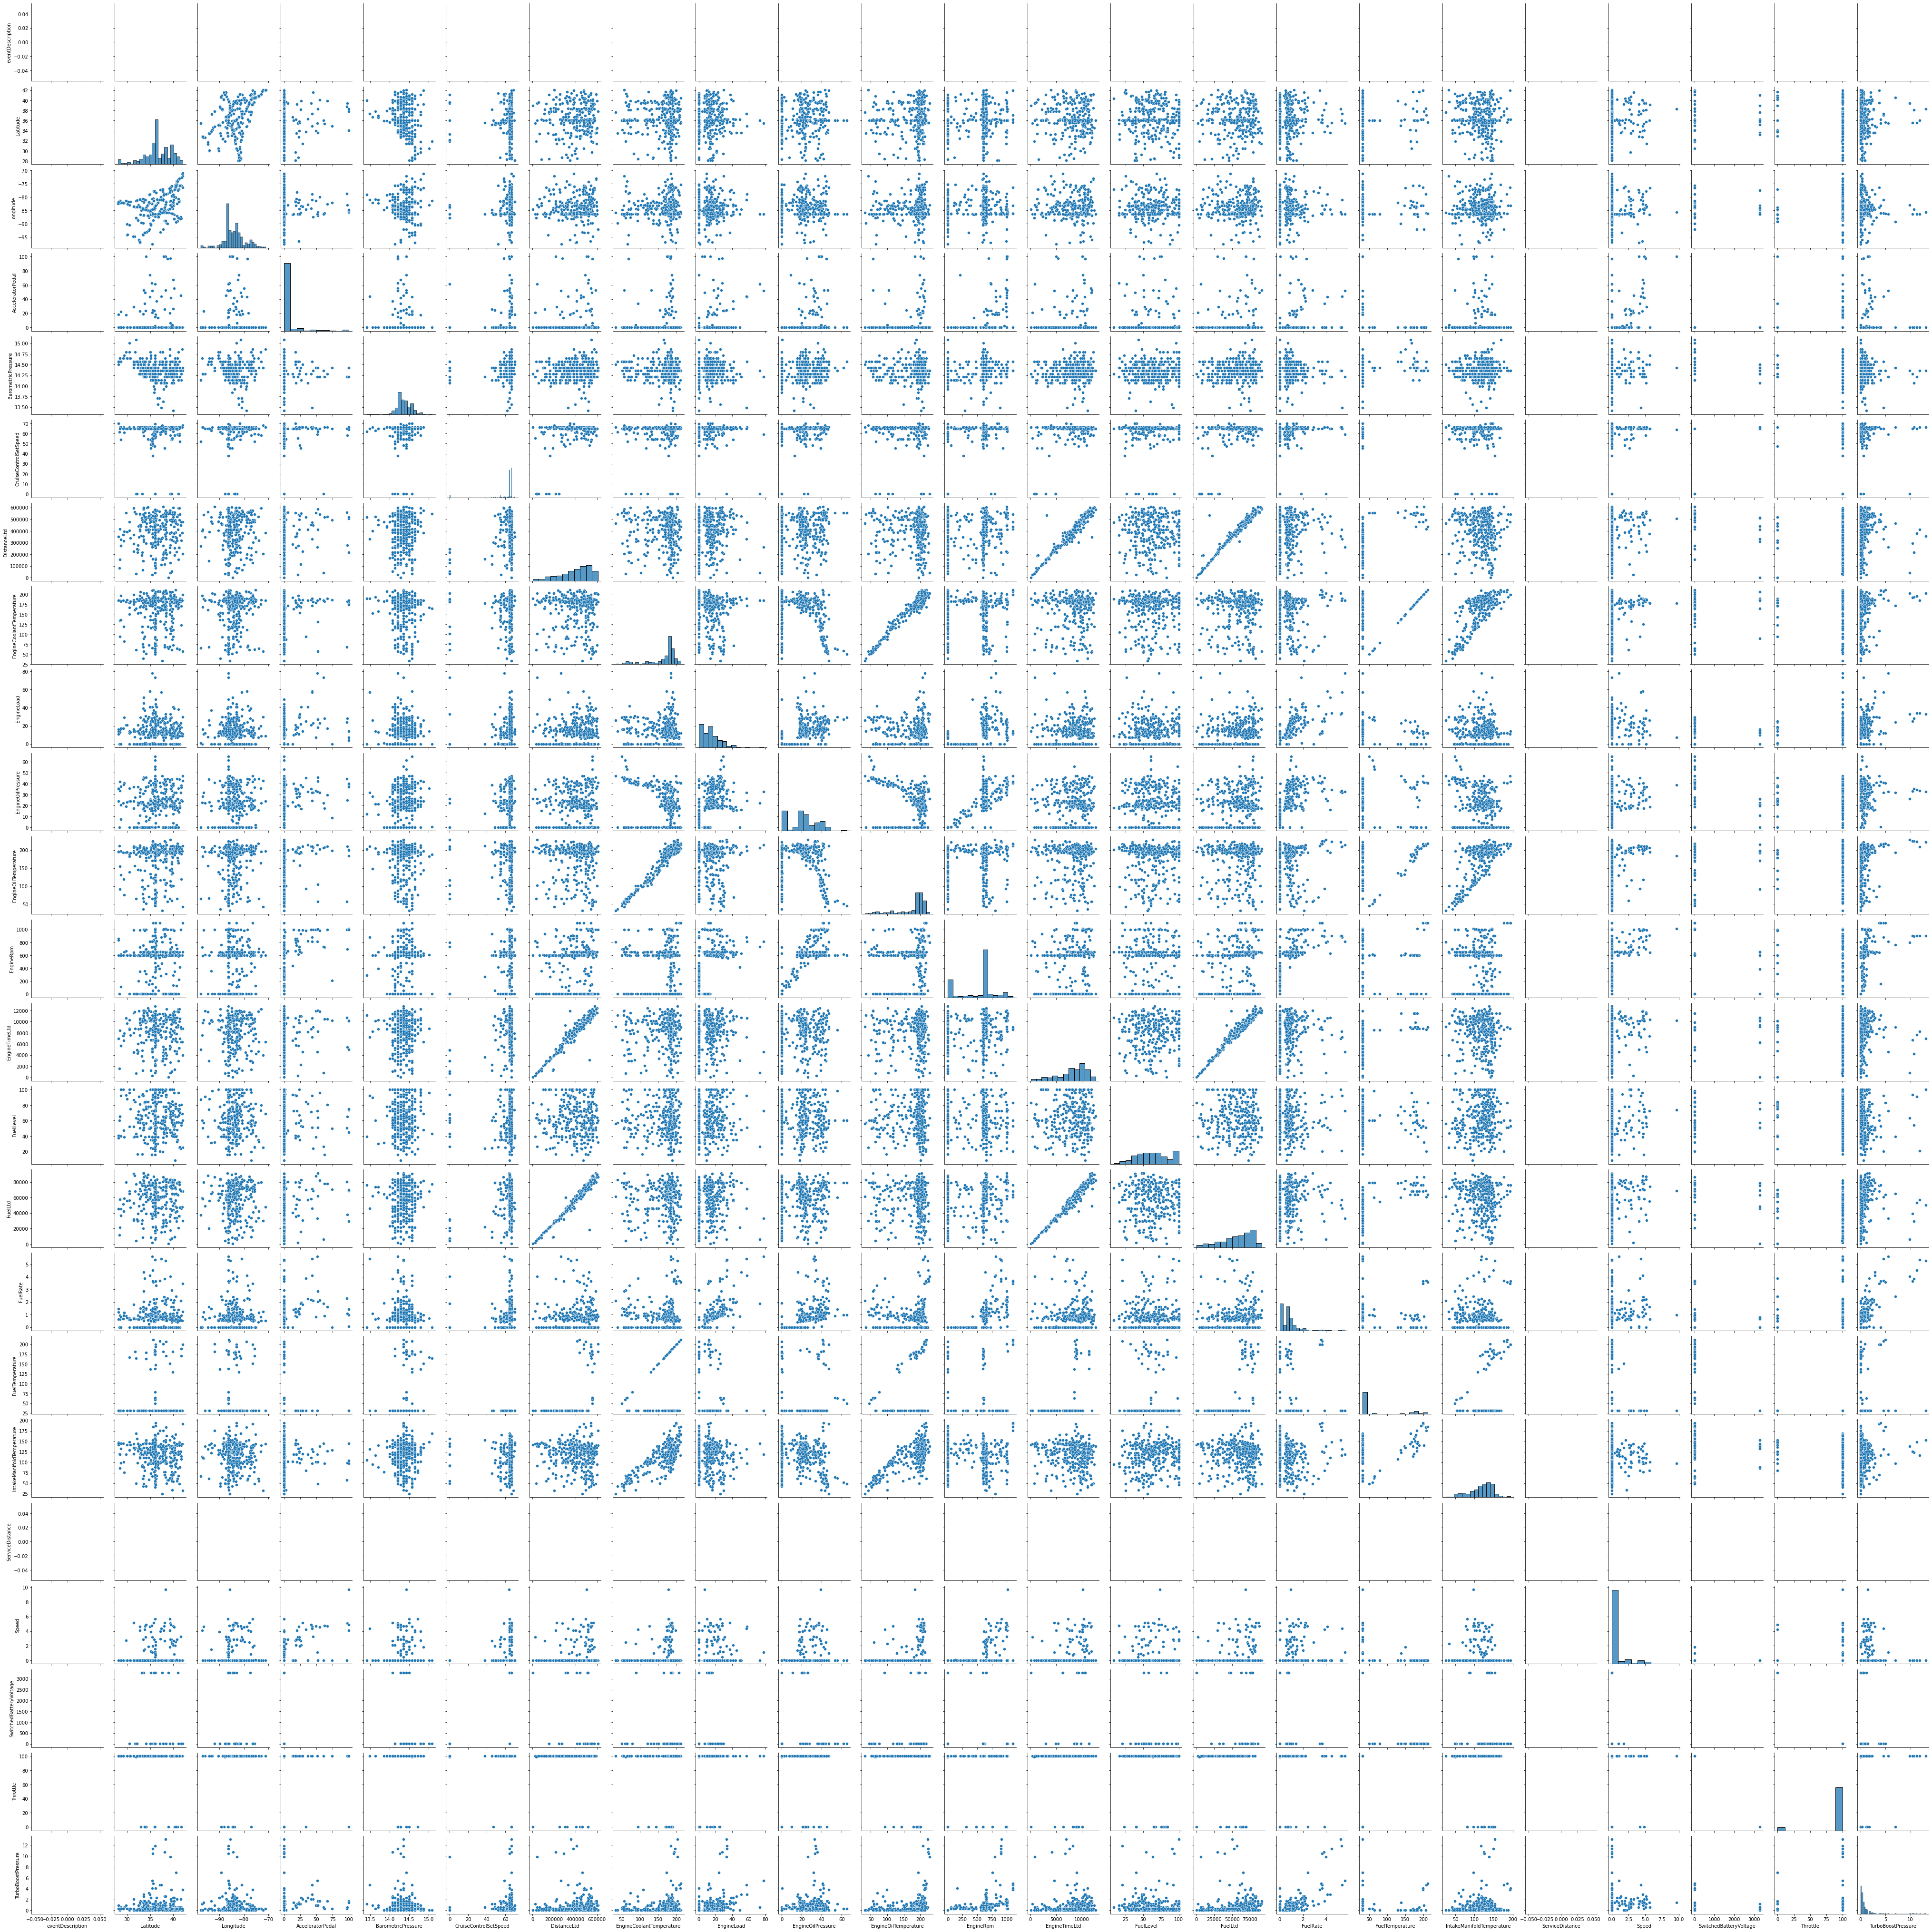

In [8]:
sns.pairplot(full_derates_num);

In [ ]:
sns.pairplot(faults_num);

In [35]:
faults_all.sort_values(['EquipmentID', 'EventTimeStamp'], ascending=False)

,Unnamed: 0,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuModel,ecuMake,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
RecordID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5000,5519,2015-02-25 06:38:40,1060204,Incorrect Data J1939 Network #1 Primary Vehicl...,unknown,unknown,unknown,639,2,False,127,R1764,36.001296,-86.501481,2015-02-25 06:38:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN
4953,5470,2015-02-25 06:08:43,1059704,Incorrect Data J1939 Network #1 Primary Vehicl...,unknown,unknown,unknown,639,2,True,127,R1764,36.001296,-86.501435,2015-02-25 06:10:53,21.6,14.4275,False,66.48672,83681.85,154.4,12.0,40.6,160.925,945.375,1562.75,93.6,11847.191930018,1.598246,32,True,93.2,1279,False,4.378725,3276.75,0,1.74
6447,6961,2015-02-26 13:50:59,1090499,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,6X1u13D1500000000,CMMNS,5848,9,False,1,R1762,39.953379,-81.937407,2015-02-26 13:50:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN
6439,6953,2015-02-26 13:12:11,1089561,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,6X1u13D1500000000,CMMNS,5848,9,True,1,R1762,39.952870,-81.936990,2015-02-26 13:12:48,0,14.21,False,66.48672,80838.7,134.6,11.0,38.86,148.7188,595.75,1547.55,22.4,11527.675833124,0.6604322,32,True,84.2,17407,False,2.058292,3276.75,0,0.29
4495,5015,2015-02-24 16:24:05,1052146,Low (Severity Medium) Catalyst Tank Level,05317106*04119044*051914190353*09400015*G1*BDR*,6X1u13D1500000000,CMMNS,1761,18,False,11,R1762,39.551851,-86.045925,2015-02-24 16:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30593,29988,2015-04-22 09:10:12,2022693,Low Voltage (Particulate Trap Outlet Pressure 1),04993120*00001782*082113134117*07700053*I0*BBZ*,6X1u10D1500000000,CMMNS,3610,4,True,1,1327,36.194861,-83.174768,2015-04-22 09:10:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,17407,NaN,NaN,NaN,NaN,NaN
5181,5697,2015-02-25 08:24:49,1062652,Low (Severity Medium) Battery Potential / Powe...,04993120*00001782*082113134117*07700053*I0*BBZ*,6X1u10D1500000000,CMMNS,444,18,False,1,1327,36.067083,-86.434722,2015-02-25 06:24:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN
5117,5633,2015-02-25 07:40:59,1061595,Low (Severity Low) Engine Coolant Level,04993120*00001782*082113134117*07700053*I0*BBZ*,6X1u10D1500000000,CMMNS,111,17,False,1,1327,36.067083,-86.434722,2015-02-25 06:24:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN


In [36]:
full_derates.sort_values(['EquipmentID', 'EventTimeStamp'], ascending=False)

,Unnamed: 0,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuModel,ecuMake,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
RecordID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1246399,783,2020-02-27 12:11:33,122740697,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,6X1u17D1500000000,CMMNS,5246,0,False,1,2211,36.066296,-86.434490,2020-02-27 12:11:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN
1245454,782,2020-02-24 15:27:26,122305096,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,6X1u17D1500000000,CMMNS,5246,0,True,1,2211,36.066620,-86.434722,2020-02-24 15:28:02,0.0,14.2100,False,0.00000,126789.3,77.0,0.0,0.00,77.7875,0.000,3009.35,43.2,16906.350898,0.000000,NaN,True,55.4,5119,True,0.0,NaN,100.0,0.00
1238724,773,2020-02-03 16:47:40,119579957,NaN,04384413*22246857*121817205924*60701721*G1*BGT*,6X1u17D1500000000,CMMNS,5246,0,False,1,2211,36.066574,-86.434768,2020-02-03 16:47:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN
1238721,772,2020-02-03 16:34:21,119578297,NaN,04384413*22246857*121817205924*60701721*G1*BGT*,6X1u17D1500000000,CMMNS,5246,0,True,1,2211,36.067129,-86.434768,2020-02-03 16:34:57,0.0,14.2825,False,66.48672,126107.9,192.2,0.0,19.14,216.1062,477.875,2979.20,22.8,16793.681518,0.000000,NaN,True,141.8,22527,True,0.0,NaN,100.0,0.58
1086389,639,2018-11-28 13:40:02,69650058,NaN,04384413*22224806*121817205924*60701721*G1*BGT*,NaN,NaN,5246,0,False,1,2209,31.901388,-87.731666,2018-11-28 13:39:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714,9,2015-02-25 13:53:08,1070646,NaN,unknown,unknown,unknown,5246,0,True,1,1329,39.399583,-82.974768,2015-02-25 13:56:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,22527,NaN,NaN,NaN,NaN,NaN
1054365,617,2018-09-10 05:08:58,61163545,NaN,05317106*04075152*092613211021*09300006*G1*BDR*,6X1u13D1500000000,CMMNS,5246,0,False,1,306,36.066666,-86.434814,2018-09-10 05:09:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN
1054353,616,2018-09-10 04:41:48,61162256,NaN,05317106*04075152*092613211021*09300006*G1*BDR*,6X1u13D1500000000,CMMNS,5246,0,False,1,306,36.066157,-86.435138,2018-09-10 04:41:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN


In [37]:
faults_diagnostics.sort_values(['EquipmentID', 'EventTimeStamp'], ascending=False)

,Unnamed: 0,EventTimeStamp,ESS_Id,eventDescription,ecuSoftwareVersion,ecuModel,ecuMake,spn,fmi,active,activeTransitionCount,EquipmentID,Latitude,Longitude,LocationTimeStamp,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,EngineRpm,EngineTimeLtd,FuelLevel,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
RecordID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1246436,920656,2020-02-27 13:53:14,122757498,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,6X1u17D1500000000,CMMNS,5394,5,False,1,2211,36.066342,-86.434490,2020-02-27 13:53:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1023,NaN,NaN,NaN,NaN,NaN
1246399,920637,2020-02-27 12:11:33,122740697,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,6X1u17D1500000000,CMMNS,5246,0,False,1,2211,36.066296,-86.434490,2020-02-27 12:11:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17407,NaN,NaN,NaN,NaN,NaN
1246400,920636,2020-02-27 12:10:53,122740698,NaN,04384413*22246857*090619141107*60701756*G1*BGT*,6X1u17D1500000000,CMMNS,5394,5,True,1,2211,36.066296,-86.434490,2020-02-27 12:11:29,13.2,14.5000,False,0.00000,126789.4,42.8,26.0,48.14,38.13125,916.875,3009.45,39.2,16906.482984,1.941671,NaN,True,51.8,17407,True,0.00000,NaN,100.0,1.74
1246332,920581,2020-02-27 08:42:47,122706890,Low (Severity High) Battery Potential / Power ...,5516010*202.21.0*5516502*E003.e003*5539401*25....,EEO-xxF112C,EATON,168,1,True,1,2211,36.066342,-86.434537,2020-02-27 08:43:07,0.0,14.5000,False,0.00000,126789.4,32.0,0.0,0.00,33.57500,0.000,3009.40,39.2,16906.482984,0.000000,NaN,True,33.8,51199,True,0.00000,NaN,100.0,0.00
1246316,920579,2020-02-27 08:41:12,122700678,Abnormal Frequency J1939 Network #2,NaN,CECU3B-NAMUX4,PACCR,1231,8,True,4,2211,36.066296,-86.434490,2020-02-27 08:41:48,0.0,14.5000,False,0.00000,126789.4,32.0,0.0,0.00,33.57500,0.000,3009.40,39.2,16906.482984,0.000000,NaN,True,33.8,1279,True,0.00000,NaN,100.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74435,50177,2015-06-03 02:28:44,2750424,Condition Exists Cruise Control Enable Switch,unknown,unknown,unknown,596,31,True,16,306,37.035972,-86.236342,2015-06-03 02:29:19,100.0,14.3550,False,64.62260,119600.1,181.4,100.0,41.18,197.88130,1348.375,2374.85,91.6,15975.804845,18.663810,32.0,True,116.6,255,False,65.79739,3276.75,0.0,28.13
61033,41266,2015-05-21 06:51:36,2543683,Condition Exists Cruise Control Enable Switch,unknown,unknown,unknown,596,31,False,15,306,36.066435,-86.434768,2015-05-21 06:51:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255,NaN,NaN,NaN,NaN,NaN
60843,41125,2015-05-21 03:47:49,2541396,Condition Exists Cruise Control Enable Switch,unknown,unknown,unknown,596,31,True,15,306,37.919351,-85.687500,2015-05-21 03:48:25,90.0,14.4275,False,64.62260,115739.6,183.2,96.0,41.18,198.72500,1338.125,2297.90,80.8,15469.519107,18.610980,32.0,True,111.2,255,False,64.78766,3276.75,0.0,29.00


In [ ]:
pca_faults = PCA().fit(faults_num)

### The NaNs are a problem. I can't use PCA with so many NaNs. Trying MICE.
https://towardsdatascience.com/multiple-imputation-with-random-forests-in-python-dec83c0ac55b

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [ ]:
# Introduce missing values
faults_imp = IterativeImputer(random_state=1991)
faults_imp.fit(faults_num)

In [ ]:
faults_imp.transform(faults_num)

In [ ]:
faults_imp.fit_transform(faults_num)

In [ ]:
faults_imp.get_params()